# Capstone 2 Inference Statistical Data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import mlab

In [2]:
from scipy.stats import norm

In [3]:
df = pd.read_csv('C:\Springboard\Springboard01\Capstone\Capstone 2\Data\datawithfeatures.csv')
df.shape

(185, 53)

In [4]:
df.head()

,DistanceL,DistanceR,Gender,Label,Subject,LTypeFSum,LTypeSSum,LTypeFCount,LTypeSCount,LTypeFMean,...,LVerDirNMean,RVerDirUSum,RVerDirDSum,RVerDirNSum,RVerDirUCount,RVerDirDCount,RVerDirNCount,RVerDirUMean,RVerDirDMean,RVerDirNMean
0,13413.296257,13580.306540,1,0,111GM3,15320.0,14520.0,171,172,89.590643,...,62.027027,11220.0,9900.0,8860.0,262,235,148,42.824427,42.127660,60.272109
1,8788.682167,8509.062191,0,1,111JA2,22100.0,17840.0,288,288,77.003484,...,43.737024,13740.0,13520.0,12680.0,324,317,302,42.407407,42.784810,41.986755
2,9765.357380,10281.893102,1,1,111RP1,24780.0,15180.0,239,240,103.682008,...,47.918367,14680.0,13300.0,11860.0,326,357,260,45.030675,37.254902,45.791506
3,11950.957324,11461.339153,1,0,112JU3,23920.0,15960.0,243,244,98.436214,...,46.666667,10600.0,13300.0,15980.0,270,360,329,39.259259,36.944444,48.719512
4,4959.743932,4913.022136,1,1,112KA1,29920.0,9760.0,249,249,120.645161,...,33.717579,12420.0,15920.0,11580.0,400,457,355,31.050000,34.912281,32.619718


The DistanceL and DistanceR are derived using the data from the eye movements while reading. It is plotted for visual represntation for each subject. It shows that there are samples were both are similar in value while others have a significant difference in the eye movement of Left and right direction.

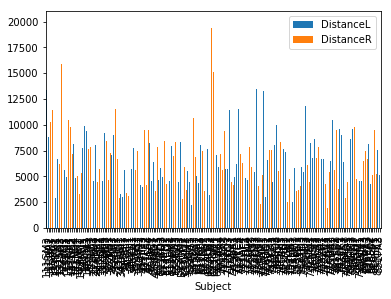

In [5]:
df.plot(kind='bar', y=['DistanceL', 'DistanceR'], x='Subject')

In [6]:
df2 = df.drop(["Subject"],axis=1)
df2.head()

,DistanceL,DistanceR,Gender,Label,LTypeFSum,LTypeSSum,LTypeFCount,LTypeSCount,LTypeFMean,LTypeSMean,...,LVerDirNMean,RVerDirUSum,RVerDirDSum,RVerDirNSum,RVerDirUCount,RVerDirDCount,RVerDirNCount,RVerDirUMean,RVerDirDMean,RVerDirNMean
0,13413.296257,13580.306540,1,0,15320.0,14520.0,171,172,89.590643,84.912281,...,62.027027,11220.0,9900.0,8860.0,262,235,148,42.824427,42.127660,60.272109
1,8788.682167,8509.062191,0,1,22100.0,17840.0,288,288,77.003484,61.944444,...,43.737024,13740.0,13520.0,12680.0,324,317,302,42.407407,42.784810,41.986755
2,9765.357380,10281.893102,1,1,24780.0,15180.0,239,240,103.682008,63.514644,...,47.918367,14680.0,13300.0,11860.0,326,357,260,45.030675,37.254902,45.791506
3,11950.957324,11461.339153,1,0,23920.0,15960.0,243,244,98.436214,65.679012,...,46.666667,10600.0,13300.0,15980.0,270,360,329,39.259259,36.944444,48.719512
4,4959.743932,4913.022136,1,1,29920.0,9760.0,249,249,120.645161,39.196787,...,33.717579,12420.0,15920.0,11580.0,400,457,355,31.050000,34.912281,32.619718


In [7]:
df0 = df[df['Label'] == 0]
df1 = df[df['Label'] == 1]


The dataset consisted of eye movement recordings from 185 children ages 8 and 9. To extract them in to data frame used the L and R value to compute the distance. The distance is computed using sqrt(square(x1-x2) + square(y1-y2). From the data extract few more columns from the eye movement data by adding LType and RType. S-Saccade and F-Fixation: If the distance travelled is < 1 (review this) then it is Fixation else Saccade. Also the eye movements of left and right in the direction of horizontal and vertical. Here three displacements are considered one left, right and no change( L, R, N) and (U, D, N). Also Since the data is recorded per folder we used a loop function to reach out to each folder and collect them all in to one table. That is a data frame with 185 rows x 53 columns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


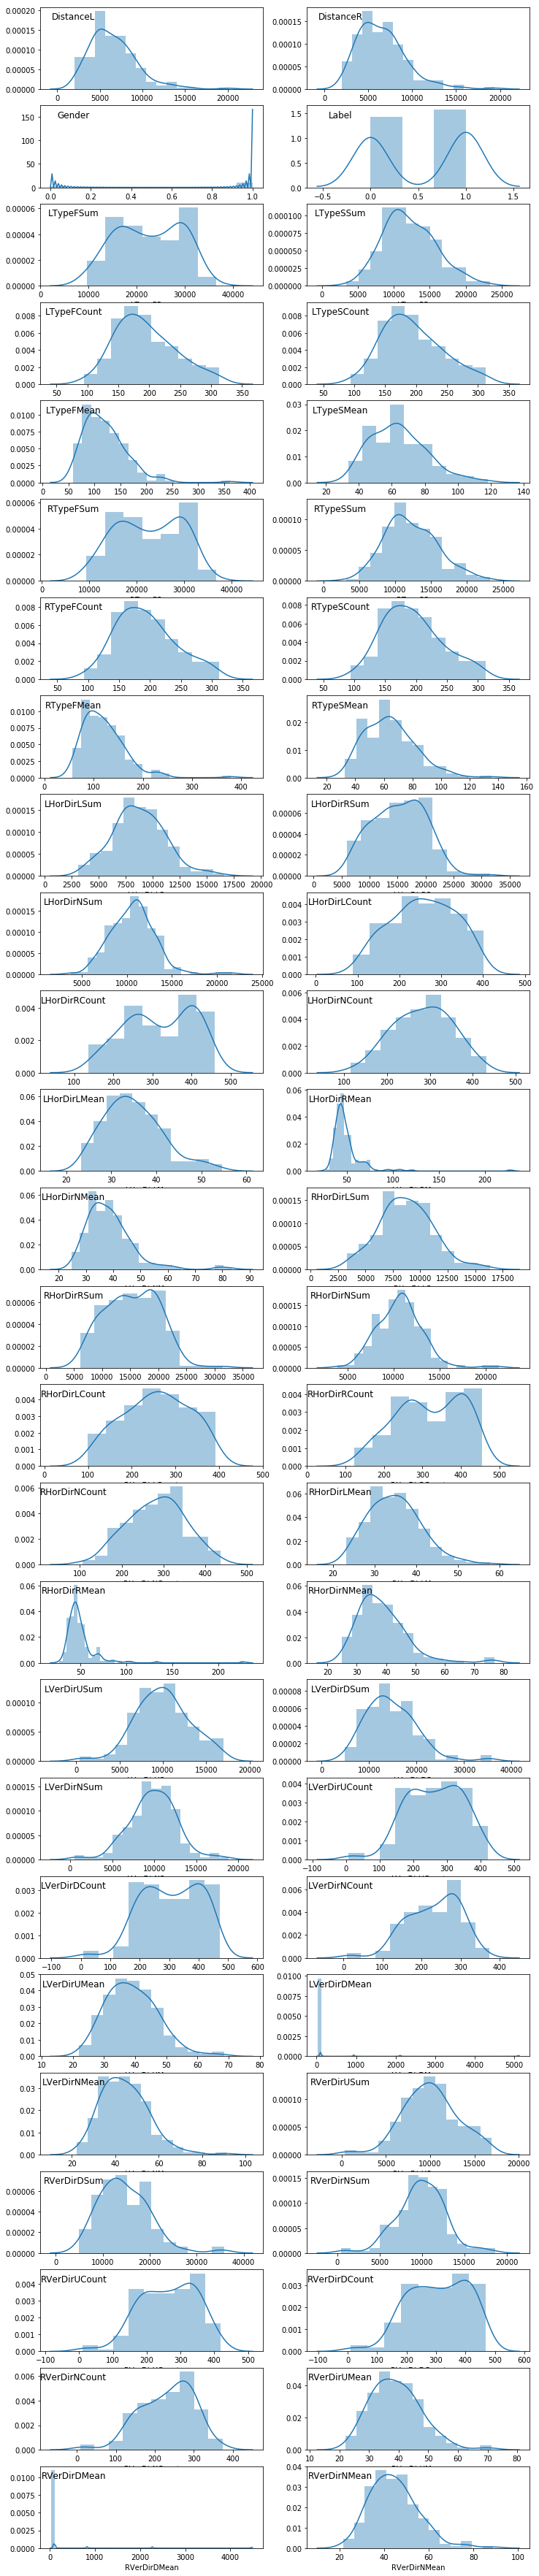

In [8]:
plt.figure(figsize=(12,64))
gs = gridspec.GridSpec(26, 2)
for i, cn in enumerate(df2.columns):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn].values)
    ax.set_xlabel(cn)
    ax.set_title( str(cn), x=0.15, y=0.8)
plt.show()

All the features are plotted in histogram and results indicates that variables such as LTypeFSum, LHorDirRSum, LHorDirLSum, RHorDirRCount etc have a major impact in determining the dyslexic nature

Let us visualize the probability distribution of both control and dyslexic groups in a single plot.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


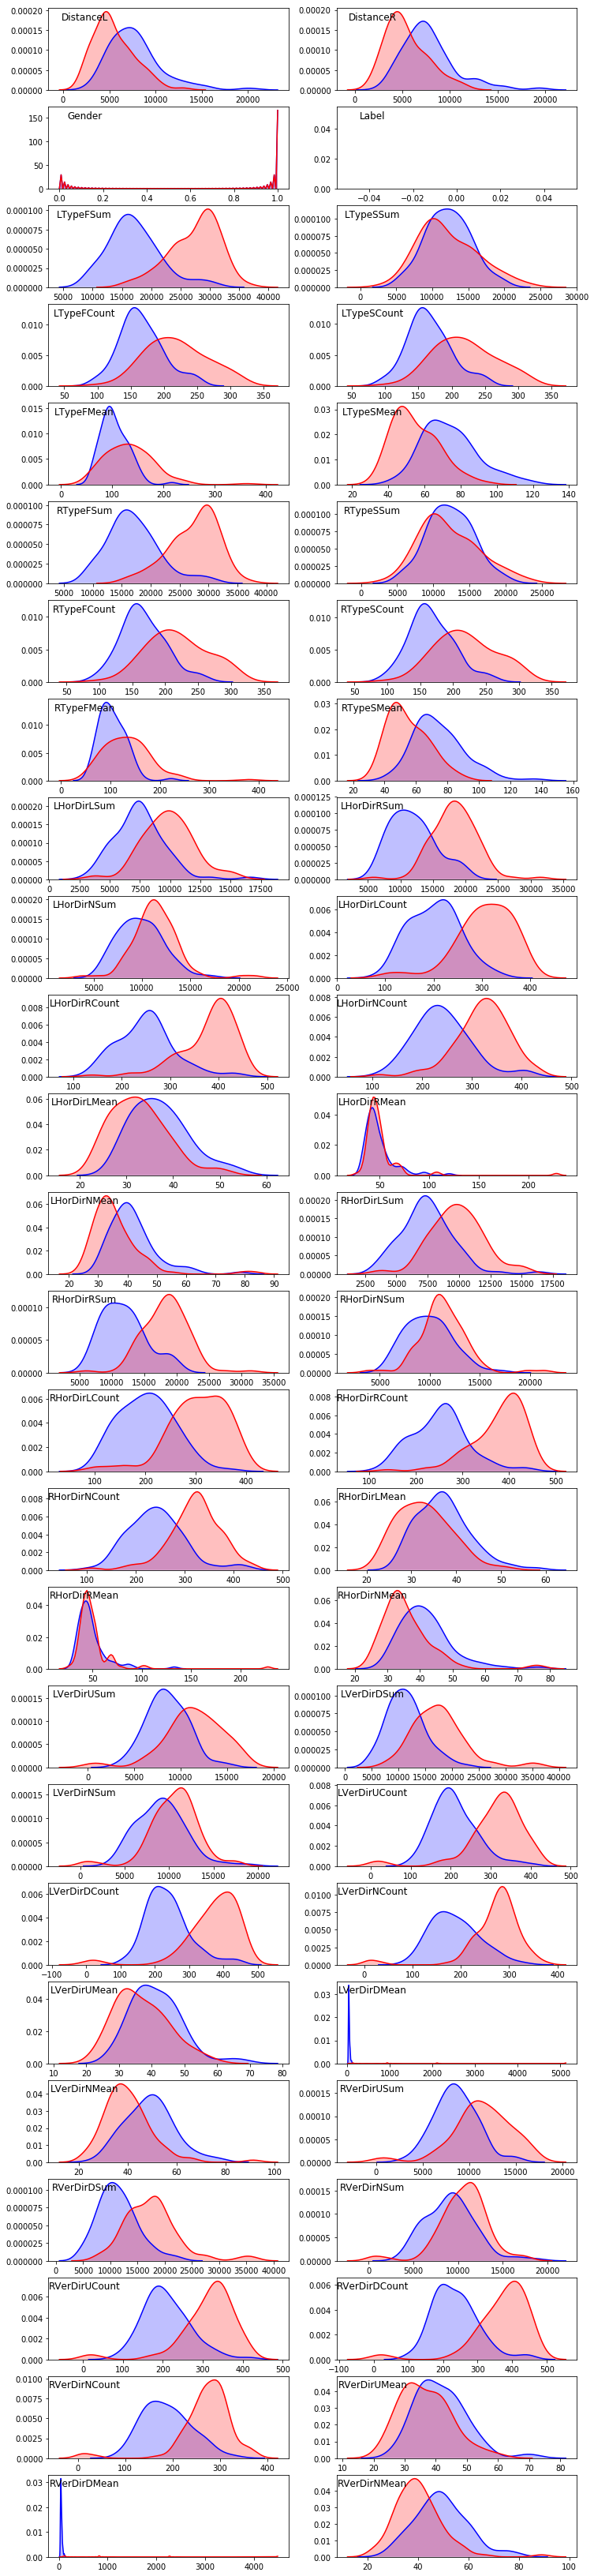

In [9]:
plt.figure(figsize=(12,64))
gs = gridspec.GridSpec(28, 2)
for i, cn in enumerate(df2.columns):
    ax = plt.subplot(gs[i])
    sns.kdeplot(df0[cn].values, color='b', shade=True, Label='Dyslexic')
    sns.kdeplot(df1[cn].values, color='r', shade=True, Label='Control')
    #ax.set_xlabel(cn)
    ax.set_title(str(cn) , x=0.15, y=0.8)
plt.show()

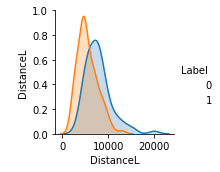

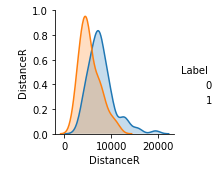

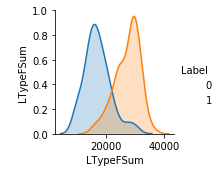

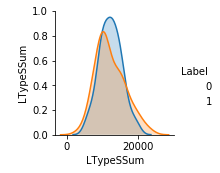

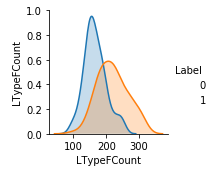

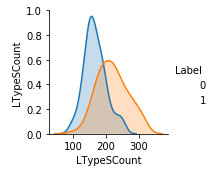

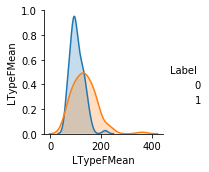

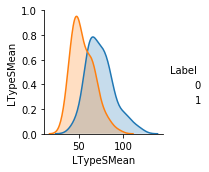

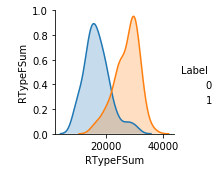

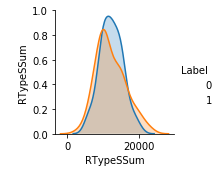

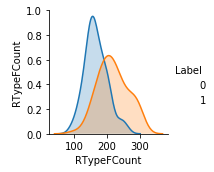

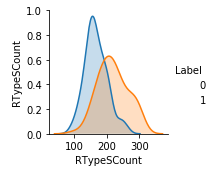

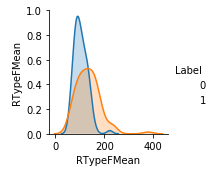

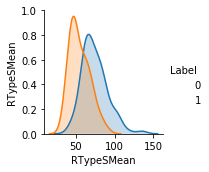

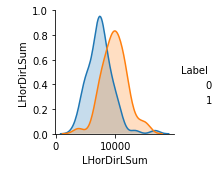

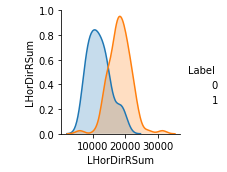

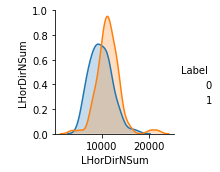

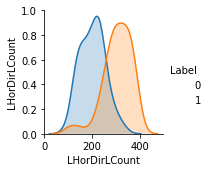

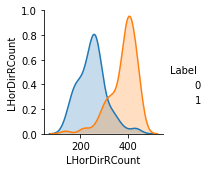

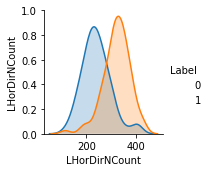

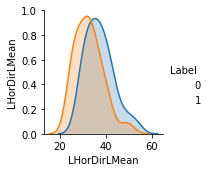

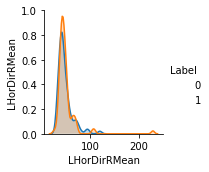

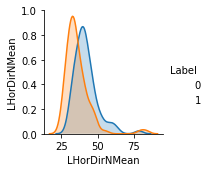

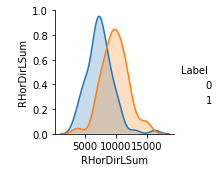

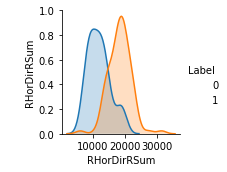

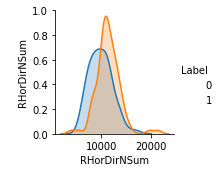

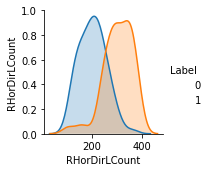

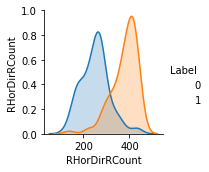

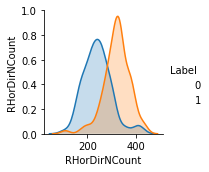

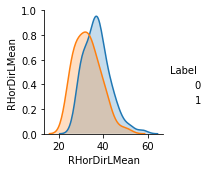

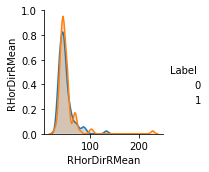

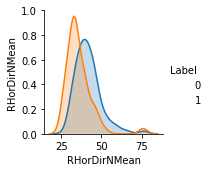

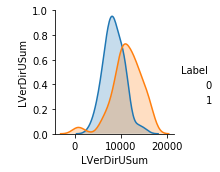

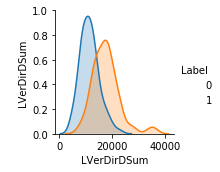

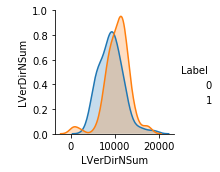

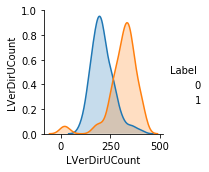

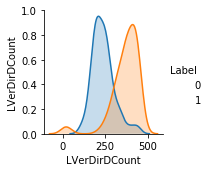

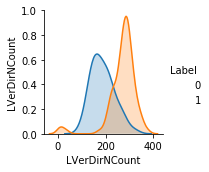

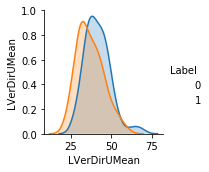

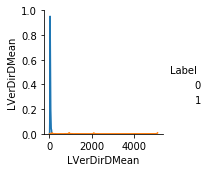

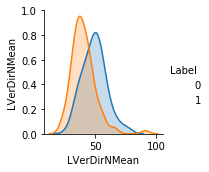

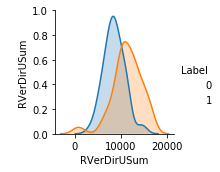

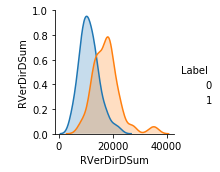

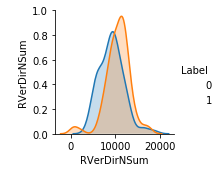

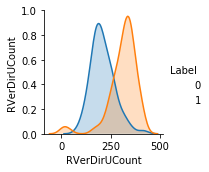

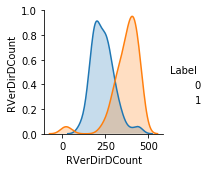

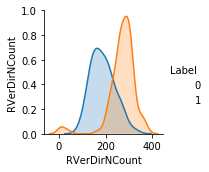

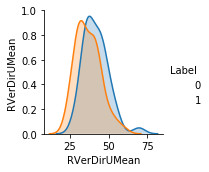

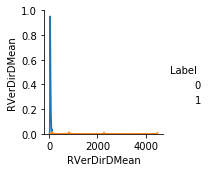

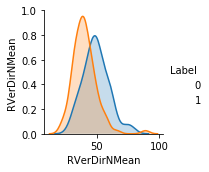

In [10]:
for i, cn in enumerate(df2.drop(['Label','Gender'], axis=1).columns):
    sns.pairplot(df2, vars = [cn], hue='Label')
    plt.show()